# Classification of Dog and Cat

### Transfer Learning :
- it is a Deep Learning technique where we use a pre-trairned model. This pre-trained model is trained for one task and can be re-trained for a similar task with a smaller dataset. Transfer Learning gives higher accuracy compared to training models from scratch.

- Examples of pre-trained models
    - VGG-16
    - ResNet50
    - Inceptionv3
    - MobileNet V2

In [6]:
# installing the Kaggle library
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

In [8]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:37<00:00, 29.7MB/s]
100% 1.06G/1.06G [00:37<00:00, 30.6MB/s]


### Now we have to unzip the file transfered through API

In [9]:
import zipfile
zip_ref= zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

### Importing Libraries

In [100]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

### Now we will use generators, which create batchs of images, to process in large amount of data

In [101]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int', # cat = 0, dog =1
    batch_size = 32,
    image_size = (256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int', # cat = 0, dog =1
    batch_size = 32,
    image_size = (256,256)
)

# generator

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


### Normalize the dataset

In [102]:
# Normalize

def process(image, label):
  image = tf.cast(image/255, tf.float32)
  return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

### Create CNN Model

In [105]:
model = Sequential()

model.add(Conv2D(32, kernel_size = (3,3), padding = 'valid', activation = 'relu', input_shape=(256,256,3)))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model.add(Conv2D(64, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model.add(Conv2D(128, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
# model.add(Dropout(0.1))
model.add(Dense(64, activation = 'relu'))
# model.add(Dropout(0.1))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 62, 62, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 30, 30, 128)     

### Compile and Execution of model

In [106]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [107]:
history = model.fit(train_ds, epochs = 10, validation_data = validation_ds)

Epoch 1/10
625/625 [==============================] - 59s 90ms/step - loss: 0.6333 - accuracy: 0.6222 - val_loss: 0.5461 - val_accuracy: 0.7294
Epoch 2/10
625/625 [==============================] - 55s 87ms/step - loss: 0.4806 - accuracy: 0.7691 - val_loss: 0.4291 - val_accuracy: 0.7998
Epoch 3/10
625/625 [==============================] - 57s 90ms/step - loss: 0.3808 - accuracy: 0.8266 - val_loss: 0.4384 - val_accuracy: 0.7998
Epoch 4/10
625/625 [==============================] - 58s 92ms/step - loss: 0.2675 - accuracy: 0.8839 - val_loss: 0.5377 - val_accuracy: 0.7874
Epoch 5/10
625/625 [==============================] - 57s 90ms/step - loss: 0.1488 - accuracy: 0.9402 - val_loss: 0.8328 - val_accuracy: 0.7792
Epoch 6/10
625/625 [==============================] - 54s 86ms/step - loss: 0.0781 - accuracy: 0.9716 - val_loss: 1.0274 - val_accuracy: 0.7880
Epoch 7/10
625/625 [==============================] - 58s 92ms/step - loss: 0.0528 - accuracy: 0.9819 - val_loss: 1.1608 - val_accuracy:

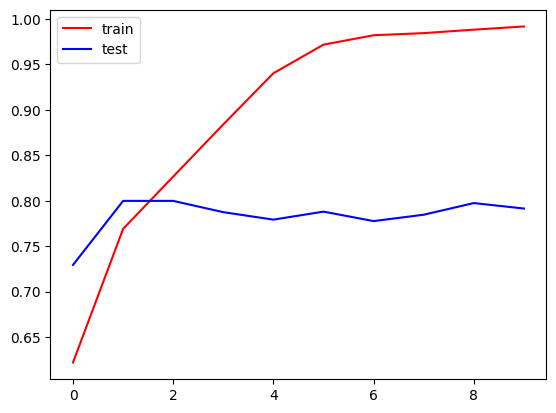

In [108]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color = 'red', label = 'train')
plt.plot(history.history['val_accuracy'], color = 'blue', label = 'test')
plt.legend()
plt.show()

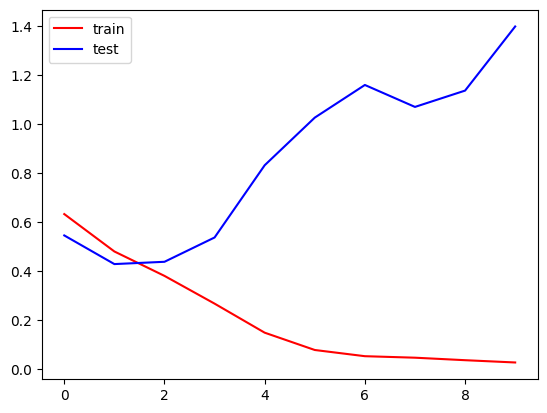

In [109]:

plt.plot(history.history['loss'], color = 'red', label = 'train')
plt.plot(history.history['val_loss'], color = 'blue', label = 'test')
plt.legend()
plt.show()

### Prediction

In [125]:
import cv2
# for image

In [126]:
test_img = cv2.imread('/content/dog.jpg')
# test_img is an array

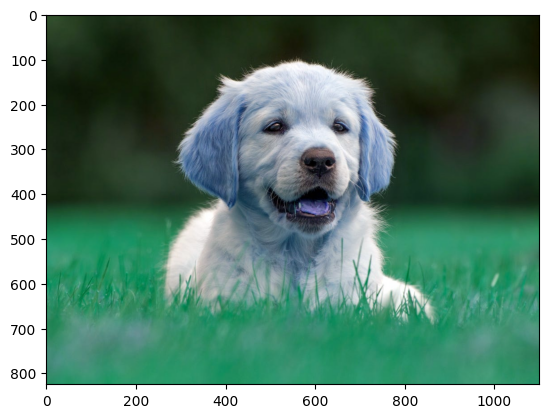

In [127]:
plt.imshow(test_img)

In [128]:
test_img.shape

(825, 1100, 3)

In [129]:
test_img = cv2.resize(test_img, (256,256))

In [130]:
test_input = test_img.reshape((1,256,256,3))
# this batch has 1 image

In [131]:
model.predict(test_input)

1/1 [==============================] - 0s 18ms/step


array([[1.]], dtype=float32)